# Assignment 2

In [1]:
import re
from textblob import TextBlob  
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np

# Importing Data File

In [2]:
df = pd.read_json(r'C:\Users\Usman\Desktop\Project\congress.json', lines = True)

In [3]:
test = list()
for x in df['full_text'][:2000]:
    test.append(x)   

# Data Cleaning

In [4]:
def tweet_clean(tweet): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

# Clean Data Result

In [5]:
arr = []
for x in df:
    arr.append(tweet_clean(x))
arr[:10]

['contributors',
 'coordinates',
 'created at',
 'display text range',
 'favorite count',
 'favorited',
 'full text',
 'geo',
 'id',
 'id str']

# Applying Clustering

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

In [7]:
cnt_vectorizer = CountVectorizer(stop_words='english')
cnt_vectorizer.fit(test)
print(cnt_vectorizer.vocabulary_)

{'rt': 5477, 'pastorjohnhagee': 4636, 'encourage': 2152, 'join': 3396, 'christians': 1252, 'america': 494, 'praying': 4863, 'nation': 4281, 'today': 6382, 'nationaldayofprayer': 4284, 'pray': 4860, 'ideagov': 3026, 'history': 2922, 'watching': 6828, 'right': 5399, 'law': 3635, 'practice': 4846, 'congress': 1430, 'legal': 3674, 'arrest': 618, 'contempt': 1473, 'fu': 2515, 'davidcorndc': 1657, 'positive': 4824, 'gophers': 2694, 'just': 3438, 'obstructive': 4445, 'realpostus45': 5204, 'sitting': 5832, 'whitehouse': 6878, 'time2admit': 6360, 'gopcomplicit': 2691, 'members': 4025, 'believe': 849, 'laworjustice': 3639, 'govern': 2700, 'hate': 2829, 'amp': 510, 'oppose': 4522, 'wethepeople': 6865, 'oppresion': 4525, 'freedomofspeech': 2492, 'https': 2982, 'itobfw833d': 3292, 'apparently': 583, 'democrats': 1752, 'recognize': 5215, 'arrogant': 622, 'silly': 5812, 'continuation': 1482, 'shown': 5786, 'tape': 6214, 'election2020': 2113, 'commercials': 1362, 'decided': 1687, 'best': 870, 'staff':

In [8]:
vec1 = cnt_vectorizer.transform(test).toarray()
print(vec1.shape)

(2000, 7105)


In [9]:
vec1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [10]:
km = KMeans(n_clusters=4)

In [11]:
km.fit(vec1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
labels = km.labels_

In [13]:
labels

array([0, 0, 0, ..., 0, 0, 1])

Set A 1121
Set B 580
Set C 209
Set D 90


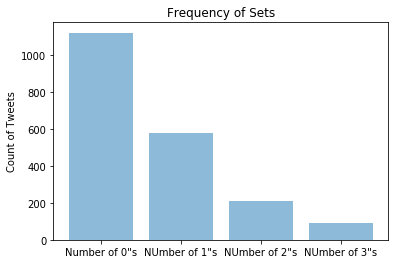

In [14]:
SetA = 0
SetB = 0
SetC = 0
SetD = 0

for x in labels:
    if x == 0:
        SetA = SetA + 1
    elif x == 1:
        SetB = SetB + 1
    elif x == 2:
        SetC = SetC + 1
    else:
        SetD = SetD + 1
        
print('Set A', SetA)
print('Set B', SetB)
print('Set C', SetC)
print('Set D', SetD)

objects = ('Number of 0"s', 'NUmber of 1"s', 'NUmber of 2"s', 'NUmber of 3"s')
y_pos = np.arange(len(objects))
performance = [SetA,SetB,SetC,SetD]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count of Tweets')
plt.title('Frequency of Sets')
 
plt.show()

# Using TextBlob 

In [15]:
public_tweets = df

# Sentiment Analysis

In [16]:
positive_tweets = []
negative_tweets = []
neutral_tweets  = []
sentiment = []
for tweet in public_tweets["full_text"]:
    print(tweet)
    analysis = TextBlob(tweet)
    print(analysis.sentiment)
    if analysis.sentiment[0]>0:
       sentiment.append('Positive')
       positive_tweets.append("text")
       print ('Positive')
    elif analysis.sentiment[0]<0:
       sentiment.append('Negative')
       negative_tweets.append("text")
       print ('Negative')
    else:
       sentiment.append('Neutral')
       neutral_tweets.append("text")
       print ('Neutral')

RT @PastorJohnHagee: I encourage you to join me and Christians across America in praying for our nation today.

#NationalDayOfPrayer #Pray…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @PastorJohnHagee: I encourage you to join me and Christians across America in praying for our nation today.

#NationalDayOfPrayer #Pray…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @IdeaGov: History is watching. Right now.
By law + practice, #Congress has the legal right to #arrest those in Contempt of Congress. 
Fu…
Sentiment(polarity=0.18035714285714283, subjectivity=0.31785714285714284)
Positive
@DavidCornDC I am positive the #GOPhers would B just as #obstructive if D #RealPOSTUS45 were sitting N D #WhiteHouse . It is time2admit it  #GOPComplicit members of #Congress do not believe N #LawOrJustice. They govern w/hate &amp; oppose #WeThePeople . #Oppresion w/ no #FreedomOfSpeech = #next https://t.co/iTOBfW833d
Sentiment(polarity=0.11363636363636363, subjectivity=0.2727272727272727)
Pos

RT @ACLJ: #Congress couldn’t successfully challenge #ObamaCare. But our brief, filing tomorrow, will do just that. ObamaCare is unconstitut…
Sentiment(polarity=0.375, subjectivity=0.6416666666666666)
Positive
Grateful that there is someone having a hawk’s eye view on the ‘rulers of India’! Thank you Supreme Court for asking ECI to decide on #Congress’s compliants against @narendramodi &amp; @AmitShah by 6th May. @ECISVEEP #BattleOf2019 #AbHogaNyay #DeshKaMahaTyohar #ElectionCommission
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
More proof, not #conspiracy

#Muslims like @Ilhan @IlhanMN @RashidaTlaib in #Congress-
GOAL, force #ShariaLaw on #AMERICANS.

#WakeUpAmerica!
Will we wait until it's too late?
Force #IlhanOmar &amp; Muslim rats to resign. https://t.co/trcL5kesUB
Sentiment(polarity=0.1625, subjectivity=0.55)
Positive
Has the #BJP politicized surgical strikes for political mileage? We analyse on #Perspective tonight at 7pm. #SurgicalStrikes #congress #rajivshukla @NewsHtn
Se

Sentiment(polarity=-0.025, subjectivity=0.525)
Negative
RT @IEEEUSA: Sparklebots Robotics Team Ladies, Makayla Jackson and Zaicoria McLean of @HendleyES showing off their #robot with @RepBillFost…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@BengalNewz @Breaking_24X7 @BengalNewzLife @BengalNewzWorld @DefenceNewz @NaxalB @maoistlegacy A day after 15 C-60 commandos were killed in a #Maoist attack in #Maharastra's #Gadchiroli district, the #Congress sought the resignation of state Chief Minister #DevendraFadnavis and said the incident reflected failure of the Union Home Ministry.  | #MaharashtraDay #NaxalAttack
Sentiment(polarity=-0.25833333333333336, subjectivity=0.15)
Negative
RT @Info4america: Somalia-Born Candidate for Congress Accused of Immigration/Marriage Fraud!
https://t.co/5Aj68tfbXV
#Adultery  #Congress #…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#Trump &amp; #Barr are #ObstructingJustice &amp; defying the constitutional authority of #Congress. Both must #Resign.

Sentiment(polarity=-0.0482142857142857, subjectivity=0.3678571428571428)
Negative
RT @iyer_rn: @ShefVaidya @indiantweeter @ArvindKejriwal The Man who garnered nearly 2 lakh votes in #Varanasi (2014) and become CM(#Delhi)w…
Sentiment(polarity=0.1, subjectivity=0.4)
Positive
RT @Trumptweets2020: CRAZY that some say MY Attorney General #Barr should be IMPEACHED for lying to #Congress &amp; defying the law!
If you’re…
Sentiment(polarity=-0.26875, subjectivity=0.7)
Negative
RT @Outlookindia: Former PM Manmohan Singh said in an interview that in the past 70 years, there had never been a #government which hid beh…
Sentiment(polarity=-0.125, subjectivity=0.125)
Negative
Will BJP win again under Modi? What do you think? #Modi #LokSabhaElection2019 #BJP #Congress #Chowkidar #NarendraModi #IndianElections2019 #cartoon #caricature #art #sketch #drawing #elect https://t.co/l09PxeMWI7
Sentiment(polarity=0.8, subjectivity=0.65)
Positive
Foundation of Gandhi family...

#Congress
#CongressMuktBharat
#R

Sentiment(polarity=0.1875, subjectivity=0.375)
Positive
RT @kamaalrkhan: According to survey reports, #congress can win 230 seats and #BJP can win 145 seats, while others can win 168 seats in #Lo…
Sentiment(polarity=0.8000000000000002, subjectivity=0.4000000000000001)
Positive
RT @kamaalrkhan: According to survey reports, #congress can win 230 seats and #BJP can win 145 seats, while others can win 168 seats in #Lo…
Sentiment(polarity=0.8000000000000002, subjectivity=0.4000000000000001)
Positive
RT @Outlookindia: Former PM Manmohan Singh said in an interview that in the past 70 years, there had never been a #government which hid beh…
Sentiment(polarity=-0.125, subjectivity=0.125)
Negative
@Reuters And the #Democrats answer is just a ##HASHTAG away from ANOTHER worthless #subpoena. #Republicans have made a mockery out of #Congress and the #Democrats have made a mockery out of subpoenas. PATHETIC. @SpeakerPelosi @RepAdamSchiff
Sentiment(polarity=-0.9, subjectivity=0.95)
Negative
RT @Outlo

RT @RachelRamone: An opponent of #cannabis #legalization from @Walgreens testified that #Vets do not face any problems from the #VA when it…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @kamaalrkhan: According to survey reports, #congress can win 230 seats and #BJP can win 145 seats, while others can win 168 seats in #Lo…
Sentiment(polarity=0.8000000000000002, subjectivity=0.4000000000000001)
Positive
RT @utkarsh_aanand: #Congress MP Sushmita Dev had gone to the #SupremeCourt, complaining that the #ElectionCommission isn't acting against…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NikhilKhale: Its quite sad to see #Congress party is not showing genuine interest to throw Modi out of power.

In Delhi, UP and Bengal…
Sentiment(polarity=-0.04999999999999999, subjectivity=0.75)
Negative
RT @utkarsh_aanand: #Congress MP Sushmita Dev had gone to the #SupremeCourt, complaining that the #ElectionCommission isn't acting against…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutra

Sentiment(polarity=-0.5, subjectivity=1.0)
Negative
#Congress President #RahulGandhi said that there will be fresh investigation into the scam involving Madhya Pradesh Professional Examination Board, commonly known as #Vyapam (Vyavsayik Pariksha Mandal) https://t.co/QlKNKtcWQa
Sentiment(polarity=0.03333333333333335, subjectivity=0.3666666666666667)
Positive
Vote Trump to keep America America #AmericaFirst #congress #AmericanPatriots https://t.co/nRLHwOYajE
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @kamaalrkhan: According to survey reports, #congress can win 230 seats and #BJP can win 145 seats, while others can win 168 seats in #Lo…
Sentiment(polarity=0.8000000000000002, subjectivity=0.4000000000000001)
Positive
RT @HarshShringla: Thank you #American Association of #Physicians of #INDIAN Origin #AAPI for your support to #India-#USA ties on your #Leg…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@KamalaHarris 

As soon as I can be sure the threats from Lobbyist on the ch

Sentiment(polarity=0.7000000000000001, subjectivity=0.7296296296296295)
Positive
RT @formerbondgirl: They sure don't deserve it. They are already robbing us &amp; working for their own best interests not ours. #congress #Ter…
Sentiment(polarity=0.7000000000000001, subjectivity=0.7296296296296295)
Positive
RT @kamaalrkhan: According to survey reports, #congress can win 230 seats and #BJP can win 145 seats, while others can win 168 seats in #Lo…
Sentiment(polarity=0.8000000000000002, subjectivity=0.4000000000000001)
Positive
#Congress is our national #embarrassment https://t.co/C9C9nHtSRT
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @GregPavlett: How did we ever get to a point in America where  Rachida Tlsib, Iliam Omar, and Alexandra Ocasio-Cortez now hold elected o…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @HSajwanization: #BREAKING: #Trump Admin, #Congress Ready to Designate #MuslimBrotherhood a Terror Group -- Sources confirm #Trump seeki…
Sentiment(polarity=0.2, 

Sentiment(polarity=0.0, subjectivity=0.875)
Neutral
#Congress which keeps saying #NarendraModi killed #economy 
data doesnot lie #gandhi's lie #LokSabhaElections2019 #GST collection jumps to Rs 1.13 lakh crore in April, the highest since its rollout https://t.co/DFKsgbTy72
Sentiment(polarity=-0.2, subjectivity=0.0)
Negative
RT @PaulWestonEden: Dear @BernieSanders &amp; #Congress: prove your ideas work in Vermont. Withdraw from ALL FEDERAL FUNDS for next 5 years and…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @ACLJ: #Congress couldn’t successfully challenge #ObamaCare. But our brief, filing tomorrow, will do just that. ObamaCare is unconstitut…
Sentiment(polarity=0.375, subjectivity=0.6416666666666666)
Positive
Shut up. The whole world remembers you being held in contempt of #Congress in the Fast &amp; Furious scandal, where you #Obama approved of selling arms to #Mexico drug cartels that killed innoccent Americans. https://t.co/5uQoIIKy1f
Sentiment(polarity=0.0666666666666666

Sentiment(polarity=-0.13333333333333333, subjectivity=0.16666666666666666)
Negative
I got an email from the HSUS #Legislative Fund, for "Bill in #Congress would require better #veterinary care, other reforms for dogs in #puppymills "
Hey Congress, how about NO #PUPPY MILLS!
Sentiment(polarity=0.171875, subjectivity=0.4375)
Positive
@MSNBC  We learned today  beyond any doubt that we do not have an #AG  or even an acting one. Unless you are looking for a TV actor like we have as #Potus.  This is a never ending sofa that will continue until #Congress takes immediate action.  All they  R doing is allowing him
Sentiment(polarity=0.05, subjectivity=0.05)
Positive
@ewarren Trump and the republicans in #Congress are forcing a #Dictatorship on US! I will not STAND for #DemLeadership not protecting us! #ImpeachmentHearingsNow @SpeakerPelosi @LeaderHoyer No more $$$ from me until you act! cc @ProudResister @selectedwisdom
Sentiment(polarity=-0.3125, subjectivity=0.5)
Negative
@realDonaldTrump You

Positive
RT @atlasstruggle: @maziehirono slanders #AttorneyGeneralBarr in a childish brat manner which should not be allowed in #Congress 

Mazie sh…
Sentiment(polarity=-0.2, subjectivity=0.8)
Negative
RT @instamojo: Phase 1 #elections are just around the corner.
This election, represent the country’s #MSMEs. #BeTheVoiceOfMSMEs 

Take this…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @DMashak: #MN Somali Muslim Policeman #MohamedNoor GUILTY of #JustineDamond  murder https://t.co/uuBANHbuMw #WETHEPEOPLE #Congress #UMN…
Sentiment(polarity=-0.5, subjectivity=1.0)
Negative
RT @IdeaGov: History is watching. Right now.
By law + practice, #Congress has the legal right to #arrest those in Contempt of Congress. 
Fu…
Sentiment(polarity=0.18035714285714283, subjectivity=0.31785714285714284)
Positive
RT @umaenauman_09: @sadiakhurram The book is The Devil behind the Mirror: Globalization. I don't have #Netflix. My son was #addicted to it.…
Sentiment(polarity=-0.4, subjectivity=0.6499999999

Neutral
RT @DailyO_: My 13 Hours with #RahulGandhi: How the #Congress President left an unforgettable impression | @satyajeettambe | https://t.co/h…
Sentiment(polarity=0.4, subjectivity=0.5)
Positive
Dammm he's so scared 😂😂

#Congress getting Majority Confirmation 😂😂 https://t.co/QNUtCFJxQP
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#ChiefJustice Appears Before Top #Court Panel On #Allegations Against Him: wht an insult to #judiciary such cheap #game plan by #congress #shameindia #saveindia time to set straight things #India so weak in #judiciary #banking letting #loose #culprits v and #sheer @narendramodi
Sentiment(polarity=0.03100961538461538, subjectivity=0.5180288461538461)
Positive
Where Is 50 Years Old Young Youth Of #Congress @INCIndia Mr. Raul Vinci @RahulGandhi
Not A Single Word From Him On #MasoodAzhar #ModiCrushesPak 
#NaMoForNewIndia #Modi #ModiCornersMasood #ModiWaveElection #ModiHaiTohMumkinHai #ModiAgain 
@rssurjewala Tu To Aaja Re Aaj 😂🤣😆😀 https://t.co/8nb3aGWOhV

Sentiment(polarity=0.5625, subjectivity=0.7)
Positive
Our proud government is unable to take a stand towards a decision which would directly affect the life of 133 crore indians from a country that as history proves tried to stab India in the back. #takeastand #India #indians #congress #bjp #protectthepoor https://t.co/ImfG7XhJO9
Sentiment(polarity=0.13999999999999999, subjectivity=0.38)
Positive
A big win for #ForeignPolicy of #modi ji. Otherwise it could never happen if corrupt #Congress was in government.#modilaodeshbanao @narendramodi @BJP4Delhi @CongressMukth bharat https://t.co/lZfDkB3oGP
Sentiment(polarity=0.10000000000000002, subjectivity=0.5)
Positive
This crowd reflects #Jaipur is fortress of @BJP4Rajasthan #Congress has to work hard to get even closer. https://t.co/mLDbdS5yMd
Sentiment(polarity=-0.2916666666666667, subjectivity=0.5416666666666666)
Negative
AG Barr - I brought pictures of my grandkids, in case you want to see them.

:-)
#NotFeelingSoGreatAgain
@cspanwj #Repub

Sentiment(polarity=0.4, subjectivity=0.5)
Positive
RT @DailyO_: My 13 Hours with #RahulGandhi: How the #Congress President left an unforgettable impression | @satyajeettambe | https://t.co/h…
Sentiment(polarity=0.4, subjectivity=0.5)
Positive
RT @DailyO_: My 13 Hours with #RahulGandhi: How the #Congress President left an unforgettable impression | @satyajeettambe | https://t.co/h…
Sentiment(polarity=0.4, subjectivity=0.5)
Positive
RT @DailyO_: My 13 Hours with #RahulGandhi: How the #Congress President left an unforgettable impression | @satyajeettambe | https://t.co/h…
Sentiment(polarity=0.4, subjectivity=0.5)
Positive
Wait &amp; watch soon morons from #congress will say that timing of this news is suspicious, it is planned by NaMo to declare this during the election so that BJP influences the voters 🤣🤣🤣 https://t.co/T09qQ8i9TW
Sentiment(polarity=-0.8, subjectivity=1.0)
Negative
RT @DailyO_: My 13 Hours with #RahulGandhi: How the #Congress President left an unforgettable impression | @

#Congress will review all anti-people moves to ensure justice.
@jkpdp &amp; @JKNC_ doing lip service to people of #Shopian &amp; #Pulwama for votes.
@INCIndia 
@INCJammuKashmir 

#LokSabhaElections2019 https://t.co/Aza4uBjOoY
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @_sabanaqvi: Just wondering if known maverick bjp rajya Sabha MP trying to help #congress by calling #RahulGandhi a #foreigner. Gives oc…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @_sabanaqvi: Just wondering if known maverick bjp rajya Sabha MP trying to help #congress by calling #RahulGandhi a #foreigner. Gives oc…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @newswithchai: Congress – NCP hope to cash in on MNS support in urban constituencies
https://t.co/Gn6PcLsY8p
@INCIndia @NCPspeaks @Mumba…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @newswithchai: Congress – NCP hope to cash in on MNS support in urban constituencies
https://t.co/MbdLDmroaV…/…/ 
#NWC #Politics #Electi…
Sentiment(

Negative
RT @vensagastudio: Indian Avengers ✌️ 😎

@rishibagree - Captain America
@AskAnshul - Iron Man
@DrRizwanAhmed1 - Clint
@desimojito - Hulk
@T…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @vensagastudio: Indian Avengers ✌️ 😎

@rishibagree - Captain America
@AskAnshul - Iron Man
@DrRizwanAhmed1 - Clint
@desimojito - Hulk
@T…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@BDUTT @priyankagandhi Presstitutes waiting for a miracle.
#Congress mukt Bharat will be a reality, not miracle.
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@smritiirani One thief pointing out finger at the other thief! Irony of Indian politics. We had enough of both your parties #BJP #Congress
Sentiment(polarity=-0.078125, subjectivity=0.4375)
Negative
#MarathiSanmaan wishes happy #birthday to the #Indian politician and a member of #Congress #BhaiJagtap 🎂😊 .

Follow: @MarathiSanmaan

#bhai #jagtap #indiannationalcongress #inc #indianpolitician #neta #elections2019 #mumbaielections #mla #votekar 

Neutral
RT @_sabanaqvi: Just wondering if known maverick bjp rajya Sabha MP trying to help #congress by calling #RahulGandhi a #foreigner. Gives oc…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
A poor #chaiwala coming out of a #BulletTrain with his kettle and tea bags after selling tea at #Paris Railway Station!

#BJP_भगाओ_देश_बचाओ #LoksabhaElections2019 #BJPMission2019 #JaayegaTohModiHi #LokSabhaEelctions2019 #CongressHaiNa #Congress https://t.co/h1CrKt8q6U
Sentiment(polarity=-0.5, subjectivity=0.6)
Negative
@Ilhan You firstly should be stating as the member of #USA #Congress that any sort of the USA military intervention would be totally illegal and criminal under @UN #Charter! 
This sort of yours and others comments are falsely normalising #USA #StateMafia criminal behaviour !!!!
Sentiment(polarity=-0.37109375, subjectivity=0.43888888888888894)
Negative
RT @vensagastudio: Indian Avengers ✌️ 😎

@rishibagree - Captain America
@AskAnshul - Iron Man
@DrRizwanAhmed1 - Clint
@desimoj

#MassBlockQuint
Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)
Positive
RT @EpochTimes: “No grounds exist to establish any purpose other than a political one.”

President Trump and 3 of his children have sued 2…
Sentiment(polarity=-0.0625, subjectivity=0.2375)
Negative
#BarrLied &amp; #BarrMustResign or #ImpeachBarr hearings MUST BE STARTED if #BillBarr refuses to RESIGN!!

#AGBarr PURPOSELY LIED &amp; DECEIVED #Congress &amp; #USA &amp; #World in his 4 page letter &amp; BOGUS PRESS CONFERENCE!!

The Point: William Barr is in deep trouble 

https://t.co/TGl0FaEn1b
Sentiment(polarity=-0.1, subjectivity=0.30000000000000004)
Negative
@Sanginamby #Congress 's blame of breaking code of conduct by #Modi &amp; #Shah is as frivolous as #RahulCitizenship by #BJP
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @EpochTimes: “No grounds exist to establish any purpose other than a political one.”

President Trump and 3 of his children have sued 2…
Sentiment(polarity=-0

Sentiment(polarity=-0.06666666666666665, subjectivity=0.19444444444444442)
Negative
RT @mass_mont: Feds charge Rochester Drug Cooperative and CEO in first criminal case over opioids - 

Lock him up with all lobbyists loving…
Sentiment(polarity=-0.07500000000000001, subjectivity=0.44166666666666665)
Negative
RT @_sabanaqvi: Just wondering if known maverick bjp rajya Sabha MP trying to help #congress by calling #RahulGandhi a #foreigner. Gives oc…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#AmericanPatriots MUST #ShowUp 2 the #POLLS &amp; #VOTEOUT ALL #RadicalLeftVermin in #PoliticalOffice They’ll do #ANYTHING 2 #DESTROY our #Democracy #Freedom #Liberty &amp; #Sovereignty #TakeDown #EVERY #DEMONRAT in #Congress #ReElect @realDonaldTrump or else #KISS #America #GoodBye https://t.co/L1DNGhympv
Sentiment(polarity=-0.2, subjectivity=0.0)
Negative
Feds charge Rochester Drug Cooperative and CEO in first criminal case over opioids - 

Lock him up with all lobbyists loving democrat senato

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
'AADHAAR-based authentication will be scrapped if we come to power': Jharkhand Congress Chief Ajoy Kumar.

Coz #Congress doesn't want 100% money reaching poor people through #DBT but want 85% to go to their Dalals as #RahulGandhi dad #RajivGandhi had said

#LokSabhaEelctions2019 https://t.co/YIGgwo1oTs
Sentiment(polarity=-0.4, subjectivity=0.6)
Negative
@DeadlineWH @NicolleDWallace I think #trump wants the #Congress to impeach him. It would further divide the country. I don't think it is what Congress wants - but trump relishes fighting and division. Make him #accountable without impeachment.
Sentiment(polarity=0.13333333333333333, subjectivity=0.2333333333333333)
Positive
RT @_sabanaqvi: Just wondering if known maverick bjp rajya Sabha MP trying to help #congress by calling #RahulGandhi a #foreigner. Gives oc…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @EpochTimes: President Trump and 3 of his children have sued 2 banks, sayi

RT @ZEROTOTHREE: Wake up, #Congress! The future begins with babies, and #StrollingThunder families are in DC from across the country to rem…
Sentiment(polarity=0.0, subjectivity=0.125)
Neutral
RT @ShobhaBJP: MB Patil wanted to divide Lingayat-Veerashaiva religion for his political gains.

Now, he wants to hide behind claiming the…
Sentiment(polarity=-0.06666666666666667, subjectivity=0.3)
Negative
RT @JaySekulow: A federal judge agrees with our stance that #ObamaCare is unconstitutional. So far, #Congress hasn’t been able to successfu…
Sentiment(polarity=0.3, subjectivity=0.8125)
Positive
RT @ZEROTOTHREE: We need #Congress to #ThinkBabies with policies that help #babies and their #families thrive. That’s why families from all…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @firstpost: #Congress leader #DigvijayaSingh may have roped in #KanhaiyaKumar as a star campaigner to counter the sharp polarisation tha…
Sentiment(polarity=-0.125, subjectivity=0.75)
Negative
If the orange one

RT @ZEROTOTHREE: We need #Congress to #ThinkBabies with policies that help #babies and their #families thrive. That’s why families from all…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
The majority of Americans support regulating the adult-use of #marijuana because it stimulates economic growth and saves lives! Click below to urge your members of #Congress to support the Regulate Marijuana Like Alcohol Act! https://t.co/1phPLwmFw9
Sentiment(polarity=0.3125, subjectivity=0.2)
Positive
@ChouhanShivraj He is not doing any good to congress with his cheap antics. It's getting worse to worst for #Congress. He is no threat to #BJP, But this comedian is greater threat to #Raga.#NaMoAgain
Sentiment(polarity=0.040000000000000015, subjectivity=0.6799999999999999)
Positive
https://t.co/WvsxEQUqmQ @NYTimes
We’re surrounded by white supremacist that shoot up this country weekly but they’re “fine people”. The illegitimate one’s reign of terror moves on unimpeded.
#Congress do your FUCKING JOBS!

Positive
RT @JanetteD: @HouseJudiciary @RepJerryNadler So happy! It's way beyond time that our U.S. #Congress help enable more U.S. states to finish…
Sentiment(polarity=0.75, subjectivity=0.75)
Positive
RT @GoNews24x7: Whopping Burden Of Debt, Says #Congress | Citing #FinanceMinistry documents, Congress claims India's public debt increased…
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Neutral
RT @DanKEberhart: No EU country has met its commitment to cut ghg emissions under #ParisAgreement, so why are Democrats in #Congress so set…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Spain just elected a 46.8% female Parliament. We can do this to -- double + the numbers of women elected to #Congress in 2020 from 23.7% to 50%+

And, on the path to the 19th's 💯 🙏@BLFF_org for 20+ years of advocacy before it was trendy #ERAnow #RatifyERA #ERAhearing https://t.co/YoHwFTde18
Sentiment(polarity=0.19999999999999998, subjectivity=0.35555555555555557)
Positive
We need #Congress to #Thi

Sentiment(polarity=0.5, subjectivity=0.5)
Positive
Ideally , #RaGa &amp; #Congress should face trial &amp; apologize the country for lieing about our Prime Minister . 

He has defamed him across his campaign and has led India down in the foreign media. https://t.co/aVzCIIB8VF
Sentiment(polarity=0.2064814814814815, subjectivity=0.4712962962962963)
Positive
RT @NH_India: Accusing the #BJP-led government of "wrecking" India's economy, the #Congress on Tuesday claimed that public debt increased b…
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Neutral
Congress Releases Documents Showing Rahul Gandhi Registered as 'Indian' Citizen Before UK Authorities | Read full report #Congress #RahulGandhi #LokSabhaElections2019
https://t.co/8gDJcikdhP
Sentiment(polarity=0.35, subjectivity=0.55)
Positive
WHY CONGRESS’ SHATRUGHAN SINHA IS GAZING AT ANNIHILATION IN PATNA.
See more @ https://t.co/FDpceXaFd6
#IndiaVoteKar #Congress #ShatrughanSinha #Patna #RahulGandhi #LokSabha #Election2019 http

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Congress MLA Jagga Reddy clarified that no one has invited him to join the TRS. 
@INCTelangana @INCIndia #Congress #JaggaReddy @trspartyonline #TRS https://t.co/pm9axJnfoa
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @prakharnegative: I won't be Surprised if #Congress or #BJP releases a Diss Track, During the 2019 Election Campaign. On the other hand…
Sentiment(polarity=-0.012499999999999997, subjectivity=0.6375)
Negative
RT @SanjaySDutt: After voting tmrw will proceed to #AICC #Delhi to take charge of my next #LokSabhaElections duty in assigned State.
As Sol…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Why VC can't fix itself | Neanderthal ... | https://t.co/6HfZHYJsC6 #CalPERS #Congress #EconomicFramework #GDP #Governance #InstitutionalInvestors #LimitedPartners #NVCA #Politics #RiskProfile #Senate #SocioeconomicValue #Startup #Subprime #Technology #TheStateOfVentureCapital
Sentiment(polarity=0.0, subjectivity=0.0)
Neutr

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@MorteAiTiranni @JanjoinedNRA @ClarBriGar #ShariaCreeps have infiltrated #Congress. https://t.co/iNqNbC88Gi
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @ShobhaBJP: -Completed Bidar-Kalburgi railway line
-IIIT to Dharwad
-State Highways being Upgraded to NHs
-Cleared suburban railway proj…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#Congress moves Election Commission over 'improper EVMs storage' in Assam https://t.co/RRWbuo1WPs #indianpolitics #india
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @hussainsadaf1: I am no fan of politics. I don't support #Congress and definitely not #BJP. But, I must say @RahulGandhi should get the…
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
Todays video part -2 election spl 
Who will be the king maker on 23 rd may 2019 
#LokSabhaElections2019 #astrology #Nifty #congress
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NEWS9TWEETS: Has Ramya stooped too low by comparing PM

Modi claims 40 TMC MLAs are in touch with BJP 
#Modi #claims #TMC #MLAs #BJP #Congress #WestBengal #Mamata

https://t.co/suYOgOvpvO
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
It’s Army v/s Airforce in Shimla Reserve constituency
#Army #Airforce #Shimla #Reserve #constituency #India #BJP #Congress

https://t.co/kwCp5JNbHA
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @kishkindha: Here are predictions of #GeneralElections2019 from
@MamataOfficial in #UttarPradesh 
■ #BJP will get less than 17 seats in…
Sentiment(polarity=-0.16666666666666666, subjectivity=0.06666666666666667)
Negative
#LokSabhaElections: #Congress releases list of star campaigners in #Punjab and #Chandigarh for #LokSabhaElections2019. https://t.co/wzk13RZZuG
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
George Orwell 
#senate #congress https://t.co/6Xb19FXpYa
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#Prediction #impact. 123M #highlyskilled #highlypaid #jobs by 2020 .50M to #qualify  #BillGates 

Sentiment(polarity=0.0, subjectivity=0.125)
Neutral
RT @MahmoudElhadi: Today 6_April look how Elbashir’s Militias run from people anger and demonstrating , Please help Sudan. #Civil_disobedie…
Sentiment(polarity=-0.7, subjectivity=0.2)
Negative
RT @EconomicTimes: Addressing an election rally in #Rajasthan's #Dholpur district, @RahulGandhi said the #Congress will deposit Rs 3.60 lak…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @ZEROTOTHREE: The #StrollingThunder babies are back and crying out for change! Join them tomorrow, 4/30, on the East Lawn of Capitol Hil…
Sentiment(polarity=-0.125, subjectivity=0.3)
Negative
RT @Rectitude20: In search of 90 @Merck @CDCgov @US_FDA employees or members of #Congress willing to publicly receive 3 shots of #Gardasil.…
Sentiment(polarity=0.125, subjectivity=0.4083333333333333)
Positive
RT @JaySekulow: A federal judge agrees with our stance that #ObamaCare is unconstitutional. So far, #Congress hasn’t been able to successfu…
Sentiment(polarity=

Positive
This is the reality for our children- shame on the #GOP, #Trump . and #Congress https://t.co/5X9mof5xqv
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
it's heartbreaking that our kids have to learn this in school... Thanks, #NRA and all of the clowns in #Congress that are taking their money to keep this vicious circle going. https://t.co/E4gRJMLKwW
Sentiment(polarity=-0.4, subjectivity=0.6)
Negative
RT @anotherspaniel: @washingtonpost 10,000 #lies by a U.S. President enabled by @SenateGOP @HouseGOP who have decided #Congress should enab…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NACACWonk: It's not too late to make your voice heard! Tell #Congress to #ProtectTheDream by supporting #HR6, the American Dream and Pr…
Sentiment(polarity=-0.041666666666666664, subjectivity=0.2833333333333333)
Negative
@TajinderBagga As a great person once said, “I will not even hire him as my clerk!” @RahulGandhi 
And he’s heading @INCIndia ... Says a lot about where the #Congress sta

Neutral
RT @anotherspaniel: @washingtonpost 10,000 #lies by a U.S. President enabled by @SenateGOP @HouseGOP who have decided #Congress should enab…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
The #ElectionCommission (EC) will on Tuesday take a decision on complaints of alleged violations of model code of conduct (MCC) against Prime Minister #NarendraModi, #Congress President #RahulGandhi and #BJP President #AmitShah, it said on Monday.

https://t.co/zb2c3OIZib
Sentiment(polarity=-0.1, subjectivity=0.1)
Negative
RT @JAMsMa: Big tech trying to stomp out @mindofjamal, @UniteAmerica1st &amp; other conservative voices. 
It's time @potus for #Congress to #DO…
Sentiment(polarity=-0.0625, subjectivity=0.2375)
Negative
RT @ShobhaBJP: Another level of desperateness from a loser!

Lost relevance in Party, Mandya rejected massively &amp; lost credibility for not…
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
RT @anotherspaniel: @washingtonpost 10,000 #lies by a U.S. President enabled by

Sentiment(polarity=0.0, subjectivity=0.125)
Neutral
#SAD submits evidence against #RajaWarring, asks CEC to order inquiry against #Congress leader
https://t.co/wJiz3QQfXG https://t.co/oUWtHYTJfu
Sentiment(polarity=-0.5, subjectivity=1.0)
Negative
Pick of the Day
https://t.co/W8Wkjq1g0z      

#AICC #Mumbaikars #Mumbai #NarendraModi #RahulGandhi #Congress @RahulGandhi @INCIndia #LokSabhaElections2019 #LokSabhaElection2019 #GeneralElections2019 #IndianPoliTRICKS #PoliTRICKS #CommonManAsks #CommonPeople #PenNewsPic https://t.co/ybZtNxD6bd
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @anotherspaniel: @washingtonpost 10,000 #lies by a U.S. President enabled by @SenateGOP @HouseGOP who have decided #Congress should enab…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#SAD submits evidence against #RajaWarring, asks CEC to order inquiry against #Congress leader
https://t.co/FUIse7H38C https://t.co/nfaeIioT60
Sentiment(polarity=-0.5, subjectivity=1.0)
Negative
RT @ZEROTOTHREE: Hey #

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @PratimaSinghINC: We feel extremely happy and proud to announce that now Pratima Singh's Facebook page is verified. Thank you all for yo…
Sentiment(polarity=0.8, subjectivity=1.0)
Positive
The longer this goes on the harder it will be to #impeach he has already degraded #institution s too far. #congress is playing a dangerous game hoping that this can be stretched out with no adverse effect... The longer we allow him to fck the constitution, the harder it will be.
Sentiment(polarity=-0.19166666666666668, subjectivity=0.3833333333333333)
Negative
RT @gkzhimomi: Vote for #Congress 

#MeraVoteCongressKo https://t.co/gfbxDKtKfL
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @cappymar: Social Security is-socialism .. we were forced to pay into it, Congress raided   it from the people of America now they won't…
Sentiment(polarity=-0.13333333333333336, subjectivity=0.13333333333333333)
Negative
@marcorubio Ask yourself, why does THIS 

Neutral
RT @anotherspaniel: @washingtonpost 10,000 #lies by a U.S. President enabled by @SenateGOP @HouseGOP who have decided #Congress should enab…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@DrGPradhan @ReallySwara After #MainBhiChowkidar campaign

All supporters of #Congress 

,#Leftist have started writing

 #mainbhichor against their 

names

#JustAsking
Sentiment(polarity=-0.05, subjectivity=0.6)
Negative
And Continuing with Session Speaker: Bob Morgan
Flexible Pipe Systems Leader, Baker Hughes @BHGECO , a GE Company, United Arab Emirates with The Topic: Unbonded Flexible Pipe System Servicing the Offshore Market at the #International #Offshore #Development #Congress (IODC 2019) https://t.co/pq5TN1OlJD
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@KellyannePolls @AOC #KellyanneConway is chief spinner for #TrumpLies. She willfully disregard truth - by coining #AlternativeFacts. She contributes 2 the hyper-violence against faiths &amp; races &amp; genders. She dismantle

Sentiment(polarity=0.3125, subjectivity=0.25)
Positive
RT @meenakshisharan: As if he’d won a medal, #Congress #BootLicker said,”Punditji’s famous for his temper”

Wanting to know #Congress ‘s in…
Sentiment(polarity=0.5, subjectivity=1.0)
Positive
RT @FilterKaapiLive: Political opposition came out on the #IntermediateResults issue today in #Telangana. While @JanaSenaParty took to the…
Sentiment(polarity=0.0, subjectivity=0.1)
Neutral
RT @meenakshisharan: Nehru turned red &amp; planted a slap on the same leader’s face, shouting on top of his voice, the mike had failed!

Meanw…
Sentiment(polarity=-0.03125, subjectivity=0.23125)
Negative
RT @in_pubs: BREAKING: @HillaryClinton said “I’m F*cked,” when she found out about the Benghazi Investigation. 

Just kidding. She didn’t s…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @meenakshisharan: #SitaramGoyal , studying in 7th standard, in 1935 went to Gandhi grounds to hear ‘the betaj badshah’ #Nehru &amp; see him…
Sentiment(polarity=0.0,

Sentiment(polarity=0.4928571428571428, subjectivity=0.5678571428571428)
Positive
Congress urge Supreme Court to take action against PM Modi and Amit Shah
#Congress
#SupremeCourt
#NarendraModi https://t.co/5RN9mxWK9R
Sentiment(polarity=0.1, subjectivity=0.1)
Positive
RT @ridhimb: 71 seats, 9 states, 961 candidates. #Elections2019 #Phase4 #BJP #Congress #MahaGathbandhan #TMC @sanjukta @teenasharmabjp http…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Ahead of a protest called by all opposition parties against the intermediate results fiasco which lead to over 20 students committing suicide, #Congress #TDP #Janasena and left party workers detained from across the state. #Telangana https://t.co/v59y5paudn
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @SudheenKulkarni: Dear Voters of #Mumbai:

Tomorrow is the day to accelerate CHANGE. Let's ensure BIG victory for #Congress.

Remember:…
Sentiment(polarity=0.0, subjectivity=0.1)
Neutral
British and #Congress Policy of 'Divide and 

Sentiment(polarity=0.0, subjectivity=0.1)
Neutral
RT @SanjaySDutt: After voting tmrw will proceed to #AICC #Delhi to take charge of my next #LokSabhaElections duty in assigned State.
As Sol…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @ReclaimingUSA20: #ImpeachDonaldTrump is trending. No really, #ImpeachDonaldTrump is trending. I’m not kidding #ImpeachDonaldTrump reall…
Sentiment(polarity=-0.1, subjectivity=0.2)
Negative
@moneycontrolcom @priyankagandhi #Congress person #PriyankaVadra speaking about DEVELOPMENT shud answer what her bro #RahulGandhi did for #Amethi where did fund used or not used by him also ur party was in power for decades what they did just filled own pockets ,check ur husband too them come and ask #BJP
Sentiment(polarity=0.5, subjectivity=0.95)
Positive
RT @NH_India: JP Agarwal, the #Congress candidate from #ChandniChowk Lok Sabha constituency, on Sunday, promised to address the sealing and…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @firstpost: #

Neutral
RT @Aviva_Polonsky: @RealCandaceO Let’s just say that when #Congress @SpeakerPelosi legitimizes #AntiSemitism and accepts #Antisemitic rhet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
when #Congress / contends with guitar heroes / #Congress can be drunk / because guitar heroes get wet
Sentiment(polarity=-0.3, subjectivity=0.7)
Negative
It’s WAY past the time to Ban #HorseSlaughter! So many NEW members of #Congress need to hear your voice and be educated on #HR961 #Yes2SAFE 🙏 PLEASE FILL OUT THE FORM➡➡ https://t.co/Pwu1qocSXG
Sentiment(polarity=0.10795454545454546, subjectivity=0.40151515151515155)
Positive
RT @Trump_Girl_USA: #SeaToSea #BuildTheWall - we are being invaded! More #CBP hired, more judges and more tech! Need all by 2020! #FightThe…
Sentiment(polarity=0.59375, subjectivity=0.5)
Positive
RT @cannabakebox: Congress Should Lead On Cannabis Justice https://t.co/pZKnV734yd #Congress #Cannabis #Justice
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @GypsySpir

Neutral
RT @ShobhaBJP: Co-Ja govt continues to instigate state Police Dept to frame RW Supporters on fake charges!!

Many cases filed against #Cong…
Sentiment(polarity=-0.140625, subjectivity=0.75)
Negative
RT @mahmoodalam1963: It’s time @RahulGandhi Ji to activate #SevaDal of #Congress, and sendthem in d interior of rural India’ remaining cons…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @EconomicTimes: The #Congress leader, who is in charge of eastern UP for the Congress, said the people of #Amethi have high self-esteem.…
Sentiment(polarity=0.16, subjectivity=0.5399999999999999)
Positive
RT @Aviva_Polonsky: @RealCandaceO Let’s just say that when #Congress @SpeakerPelosi legitimizes #AntiSemitism and accepts #Antisemitic rhet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
It’s time @RahulGandhi Ji to activate #SevaDal of #Congress, and sendthem in d interior of rural India’ remaining constituency. Booth level workers r not sufficient @divyaspandana Ji. https://t.co/9ats7Q

McConnell is part of the problem. House votes, then Senate votes. That's how it's SUPPOSED TO work. #Democracy #Congress
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Not only lack of leadership in @INCIndia in Maharastra only
 but also at national level.

@RahulGandhi is not able to lead #Congress .

#congress must have an ideology and stop misguiding innocent people in the name of #Secularism. https://t.co/IAwJI9jOYf
Sentiment(polarity=0.0625, subjectivity=0.83125)
Positive
After voting tmrw will proceed to #AICC #Delhi to take charge of my next #LokSabhaElections duty in assigned State.
As Soldiers of #Congress Party, we shall not rest till we achieve our Mission: 
@RahulGandhi Next #PM.
#VazhgaCongress #VelghaCongress
#AbHogaNYAY
#rahulgandhiforpm
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @SudheenKulkarni: Dear Voters of #Mumbai:

Tomorrow is the day to accelerate CHANGE. Let's ensure BIG victory for #Congress.

Remember:…
Sentiment(polarity=0.0, subjectivity=0.1)
Ne

Yeah, well, then when is #Congress going to put #DomesticTerrorism in the lawbook?? You people and your "feelings" aren't helping US! In fact, I think that kind of talk just pisses folks off now. DO something!😔 https://t.co/6CdL4uEXg2
Sentiment(polarity=0.6, subjectivity=0.9)
Positive
RT @Aviva_Polonsky: @RealCandaceO Let’s just say that when #Congress @SpeakerPelosi legitimizes #AntiSemitism and accepts #Antisemitic rhet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Aviva_Polonsky: @RealCandaceO Let’s just say that when #Congress @SpeakerPelosi legitimizes #AntiSemitism and accepts #Antisemitic rhet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#HimachalPradesh Chief Minister #JaiRamThakur on April 28 said the #Congress-led #UPA regime used to remain mute spectator over attacks by #Pakistan-based #terrorgroups.

#LokSabhaElections2019 #Dangal2019 #GeneralElections2019 

Photo: IANS https://t.co/cz9PeO6cTW
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @neelakantha:

Sentiment(polarity=-0.005729166666666667, subjectivity=0.4080357142857143)
Negative
#LokSabhaElections2019 #4thPhase #BJP #Congress #ElectionsAnalysis Can the Congress  Reclaim Lost Space? 

https://t.co/623HyVjXYh
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Aviva_Polonsky: @RealCandaceO Let’s just say that when #Congress @SpeakerPelosi legitimizes #AntiSemitism and accepts #Antisemitic rhet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @jcinca1: @TrueFactsStated @MicheleJeanson1 #Congress really must arrest him. We're WAY past the impeachment debate. 😡😳
Sentiment(polarity=-0.033333333333333326, subjectivity=0.15)
Negative
Time to EXEMPT. #RepublicansForImpeachment #SaturdayThoughts #Trump #ImpeachDonaldTrump #MAGA #MuellerReport #WWG1WGA #Resist @The_Trump_Train #Trump2020 #BarrCoverUp #Congress #ComplicitGOP #AmericansForImpeachment #DerangedDonald #TheResistance https://t.co/hq5B76TjCz
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Aviva_Polonsky: @RealCanda

Neutral
We're so honoured for having H.E Our Chairman Khamis Juma Buamim at our Congress and Mr Fahed giving the chairman: H.E Khamis his trophy at the #International #Offshore #Development #Congress (IODC 2019) https://t.co/aMX5S4K8ob
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @KanchanGupta: Asif Md Khan, former Congress MLA from Okhla, said at a poll rally Atishi (of AAP) is a "Yehudi" (Jew) and "Muslims canno…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
A Mom can't let the kids down..what if they're utterly useless &amp; did nothing to get awarded for..it's ancestorial for them to reward themselves for no good reason..!!  

#INCongress #Congress &amp; fake #Gandhis https://t.co/7RVQeTx9x7
Sentiment(polarity=-0.5, subjectivity=0.6)
Negative
RT @Aviva_Polonsky: @RealCandaceO Let’s 

Sentiment(polarity=0.0, subjectivity=0.42833333333333334)
Neutral
What a beautiful lyrics... 👌
This shows the dedication of congress party... 
#Congress #ModiMehangaPada #dontvoteformodi #JaiHind https://t.co/4ZiSMu0fzX
Sentiment(polarity=0.85, subjectivity=1.0)
Positive
Biggest cause of concern for @INCIndia is not @narendramodi or, @BJP4India. #Congress is most worried abt reinvigorated #India where #Indians now realise that all along for 70 years they were taken for ride, cheated with #falsenarratives &amp; ppl in power for decades looted country
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
@ArvindKejriwal You are real hypocrite, you gget elected bby cursing #Congress and now you want a tie-up, remember you had sweared on your children?
Sentiment(polarity=0.2, subjectivity=0.30000000000000004)
Positive
RT @ShobhaBJP: Co-Ja govt continues to instigate state Police Dept to frame RW Supporters on fake charges!!

Many cases filed against #Cong…
Sentiment(polarity=-0.140625, subjec

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @KanchanGupta: Asif Md Khan, former Congress MLA from Okhla, said at a poll rally Atishi (of AAP) is a "Yehudi" (Jew) and "Muslims canno…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Time for charges, counters; ‘rude’ Pinarayi will have to open up after May 23
#pinarayivijayan #AICC #CPIM #CPM #Congress #LDF #UDF #KPCC #Kerala #LokSabhaElections2019 #Wayanad #Pathanamthitta #Thiruvananthapuram
https://t.co/UrzeUvwOdQ
Sentiment(polarity=-0.15, subjectivity=0.55)
Negative
Give us strong support, I’ll give you strong India: Modi
#NarendraModi #BJP #AICC #Congress #Sitapur #Samajwadi #bahujansamajparty #election #terrorism #EVM #NDA #UPA #Naxalism
https://t.co/CfAbiI6u8G
Sentiment(polarity=0.4333333333333333, subjectivity=0.7333333333333333)
Positive
Writing on the wall clear for Modi after three phases of poll: Jairam Ramesh
#JairamRamesh #AICC #NarendraModi #Jharkhand #Ranchi #Congress #BJP #JPCC #MannKiBaat #UPA  #NDA #Bangladesh

Positive
#Trump is ignoring subpoenas, and refusing to let anyone in his administration testify in #Congress.  Hmm?!  Call me old-fashioned, but isn’t that called “Obstruction Of Justice”  We need to end this sham. #TrumpLies #ImpeachTrumpNow
Sentiment(polarity=-0.2, subjectivity=0.3)
Negative
RT @Aviva_Polonsky: @RealCandaceO Let’s just say that when #Congress @SpeakerPelosi legitimizes #AntiSemitism and accepts #Antisemitic rhet…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
...allowed Hitler to do in early 1930s. WE are now ALL witnesses to the slow-motion #OVERTHROW of the U.S. Constitution &amp; powers of #Congress to restrain a rogue President's flagrant ABUSE OF POWER. &amp; UNLESS Americans now #RiseUp to DEMAND that Congress #ActNow to begin...
Sentiment(polarity=0.1, subjectivity=0.3)
Positive
This is open season for #attacks on #christians, because of some in #Congress and #FakeNewsMedia.These people are sowing #Division &amp; #Hate in our country.We can't #legislate som

Neutral
@JohnKasich The solution is a no-win... therefore, #Congress wont act until enough new members of Congress are elected on the #socialsecurityreform platform... and we’re still at least a decade away from that. #kasich2020
Sentiment(polarity=-0.05454545454545454, subjectivity=0.4515151515151515)
Negative
VERY important discussion of a groundbreaking (and CORRECT) reading of the Constitutional limits on #executivepower
The @lawfareblog Podcast: Julian @jdmortenson on 'The Executive Power' https://t.co/2xGNJ4uOES
#trump #MuellerReport #oversight #congress #separationofpower
Sentiment(polarity=0.52, subjectivity=1.0)
Positive
Isse better toh #Khamosh hi thik the....! @ShatruganSinha @INCIndia #LokSabhaElections2019 #Congress https://t.co/6CXZ2KbZpZ
Sentiment(polarity=0.625, subjectivity=0.5)
Positive
RT @PrassantV: @shilpamdas #ForkedTongue @ArvindKejriwal came to politics to fight #Congress and its #corruption now he is fighting for an…
Sentiment(polarity=0.0, subjectivity=0.0)
Ne

RT @wlfsng1130: @gtconway3d How can #POTUS45 block a subpoena on individuals to testify before #Congress, especially if an individual no lo…
Sentiment(polarity=0.0, subjectivity=0.8)
Neutral
RT @KanchanGupta: Asif Md Khan, former Congress MLA from Okhla, said at a poll rally Atishi (of AAP) is a "Yehudi" (Jew) and "Muslims canno…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @in_pubs: BREAKING: @HillaryClinton said “I’m F*cked,” when she found out about the Benghazi Investigation. 

Just kidding. She didn’t s…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @KanchanGupta: Asif Md Khan, former Congress MLA from Okhla, said at a poll rally Atishi (of AAP) is a "Yehudi" (Jew) and "Muslims canno…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Don't wait to enforce rules. Trump acolytes won't like jail. Trump can't afford to pay their fines or their lawyers. America can't afford to wait. #alternativefacts #SAD #conman #congress
Sentiment(polarity=-0.3, subjectivity=0.5)
Negat

RT @prabhloch: #media asked me why I support @KirronKherBJP despite being the #HumanRights activist that I am. Here's who I support and why…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
As if @RahulGandhi #RahulGandhi wasn't enough an embarrassment @rssurjewala @JhaSanjay to defend, they've recruited the motherboard in the form of @ShatruganSinha.

This picture says- i'll help #Pappu to put an end to #Congress chor party &amp; realise the idea of #CongressMuktBharat https://t.co/50CEtww07E
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
Suddenly after renewed hinduism of @INCIndia @RahulGandhi @priyankagandhi @JhaSanjay 2, have refrained from using the bhakt word for @narendramodi sirs fans.. is this a coincidence or is it scripted like all other issues of the #CONgress.. 🤣🤣🤣
Sentiment(polarity=-0.0625, subjectivity=0.4375)
Negative
If we do not #ImpeachDonaldTrump we will be setting a dangerous precedent for these #UnitedStates and will gravely impede the #system of #checksandb

Sentiment(polarity=0.2, subjectivity=0.2)
Positive
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @SanjaySDutt: #Congress Ka Hath
Janata Ke Sath
This is as per guidelines given by our  beloved Leaders #SoniaGandhi Ji &amp; CP @RahulGandhi…
Sentiment(polarity=0.7, subjectivity=1.0)
Positive
RT @NRECANews: .@FarmBureau urges #Congress to pass legislation ensuring electric co-ops don't risk their tax-exempt status when they accep…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@ArvindKejriwal Rules and regulations for everyone should be same . If any violations action also should be one. #Congress @RahulGandhi should come forward and take up atleast this topic https://t.co/azdA6JvMuh education also is a big issue #BJP_भगाओ_देश_बचाओ @AamAadmiParty
Sentiment(polarity=0.03333333333333333, subjectivity=0.10833333333333334)
Positive
RT @suchitrak

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @nawabmalikncp: Let's pledge to save #Aarey Forest 
from the clutches of corrupt @BJP4India @ShivSena Govt.
Let's vote @sanjaynirupam
@I…
Sentiment(polarity=-0.5, subjectivity=1.0)
Negative
RT @nawabmalikncp: Let's pledge to save #Aarey Forest 
from the clutches of corrupt @BJP4India @ShivSena Govt.
Let's vote @sanjaynirupam
@I…
Sentiment(polarity=-0.5, subjectivity=1.0)
Negative
Let's pledge to save #Aarey Forest 
from the clutches of corrupt @BJP4India @ShivSena Govt.
Let's vote @sanjaynirupam
@INCMaharashtra @NCPspeaks AND #MAHAGATHBANDHAN CANDIDATE FROM MUMBAI NORTH-WEST 
VOTE FOR @sanjaynirupam  
#MUMBAINORTHWEST
#NCP2019 #CONGRESS https://t.co/pb2mS2sqwU
Sentiment(polarity=-0.5, subjectivity=1.0)
Negative
Subpoena this! #Trump goes all 

Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@BJP4India Binna JAACh...eh to #COngress FAKE FACTORY SErvices hogga..
Sentiment(polarity=-0.5, subjectivity=1.0)
Negative
#Congress officially gave proof for how #Nehru did #surgicalstrike on #MountBatten

Oh fu*k, how can they shamelessly posted this in their official #twitter page @INCIndia 😂🤣😂🤣

 #ModiAaneWalaHai https://t.co/fediU2q9vY
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dea

Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Communalism is in thr blood of dirty #Congress and its super dirty leadership...devide and rule is what they always practice...Now the U.S.A officially exposes them...
#2019Elections

Congress party played religious politics after 26/11: leaked U.S. cables https://t.co/zqiR54cFfT
Sentiment(polarity=-0.21666666666666667, subjectivity=0.6291666666666667)
Negative
RT @SanjaySDutt: #Congress Ka Hath
Janata Ke Sath
This is as per guidelines given by our  beloved Leaders #SoniaGandhi Ji &amp; CP @RahulGandhi…
Sentiment(polarity=0.7, subjectivity=1.0)
Positive
RT @shruttitandon: Rejected a marriage proposa

@Harryjsch This is ridiculous.People break our laws, invade our country, sponge off our social systems then think WE owe them something.  Deport EVERY single one of their ungrateful butts. This has to stop #Congress HAS TO FIX OUR IMMIGRATION LAWS.  No more ILLEGALS.  @POTUS  #IllegalAliens
Sentiment(polarity=-0.09603174603174602, subjectivity=0.26031746031746034)
Negative
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @rkbnow: ♦️Still time for #Congress to withdraw their candidate Ajai Rai from Varanasi and allow Mahagathbandhan’s Shalini Yadav to go t…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthw

RT @ImmaBlueDot: Even more disturbing than @realDonaldTrump accusing those he perceives as "disobedient" of plotting a #Coup... Watching su…
Sentiment(polarity=0.0, subjectivity=0.65)
Neutral
Saw this little nugget from @RealCandaceO on @DavidJHarrisJr YouTube channel. Still don't agree with her on everything. She's admirable to watch though and this one highlights overt bias in #Congress 
https://t.co/1DCizwA2zh
Sentiment(polarity=-0.1875, subjectivity=0.5)
Negative
RT @ImmaBlueDot: @SpeakerPelosi Yes &amp; now @realDonaldTrump's accusing those he perceives as "disobedient" of plotting a #Coup. He's pitting…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while S

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @merissahamilton: As a survivor of #sexualassault &amp; victim advocate, it's infuriating #Congress allows crisis at the border of violence…
Sentiment(polarity=-0.3375, subjectivity=0.42500000000000004)
Negative
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Senti

Sentiment(polarity=-0.4, subjectivity=0.55)
Negative
#WilliamBarr Don't know how to say this more clearly Sir: You need to Quit as Trump's boy instead of US Atty General; Resign; StepDown in SHAME! #Congress: Impeach #WilliamBarr for his shameful performance and insult to the People of the US. Go home...!
Sentiment(polarity=0.22604166666666667, subjectivity=0.4611111111111111)
Positive
Why is CNN and and Omar calling for actions against Saudi-Arabia while being silent about Iran?  Because the #MuslimBrotherhood infiltrated #congress and #CNN is a carbon copy of Al-Jahzeera. 

@TheDemocrats are supporting #Iran , a country that declared war on the US. https://t.co/pC5NjzVJ0D
Sentiment(polarity=0.125, subjectivity=0.175)
Positive
In 2014 Harish Salve also said that even though #Modi is PM, #Congress (&amp; #Lobby) will rule India through #SupremeCourt

PS: Google to findout how many PILs #Congress (through #Lobby including #PrashantBhushan &amp; Tehseen Poonawala) have filed.

#TargetCJI

Neutral
RT @merissahamilton: As a survivor of #sexualassault &amp; victim advocate, it's infuriating #Congress allows crisis at the border of violence…
Sentiment(polarity=-0.3375, subjectivity=0.42500000000000004)
Negative
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutr

Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @HorowitzCenter: .@Ilhan Omar has exposed the greatest liability America faces in the global terror war.

We now have terrorists in the…
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @SanjaySDutt: #Mission Strengthen #Congress in #Puducherry.
#NewsToday in @NewIndianXpress .
Thank You @Debjani_TNIE . https://t.co/UnvD…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JaySekulow: It’s no s

RT @SanjaySDutt: #Mission Strengthen #Congress in #Puducherry.
#NewsToday in @NewIndianXpress .
Thank You @Debjani_TNIE . https://t.co/UnvD…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JaySekulow: It’s no secret. We’ve told you for years – #ObamaCare is unconstitutional. Now a federal judge agrees. It’s time for us to…
Sentiment(polarity=0.2, subjectivity=0.7)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Congress gave walk-over to the Prime Minister Mr Modi in Varanasi. They don't have courage to face him.Varanasi Varanasi #Varanasi #RahulGandhi #Congress
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejec

Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JaySekulow: It’s no secret. We’ve told you for years – #ObamaCare is unconstitutional. Now a federal judge agrees. It’s time for us to…
Sentiment(polarity=0.2, subjectivity=0.7)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @lgzlee01: Why am I NOT surprised that THIS will NOT be a major security priority for #Congress? When will you do your jobs and protect…
Sentiment(polarity=0.006249999999999999, subjectivity=0.7)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar

Sentiment(polarity=0.2, subjectivity=0.7)
Positive
RT @rkbnow: ♦️Still time for #Congress to withdraw their candidate Ajai Rai from Varanasi and allow Mahagathbandhan’s Shalini Yadav to go t…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#Congress on Friday removed a labourer from the premises of its Jaipur party office after it was observed that he was putting up a poster of Rahul Gandhi wearing Modi T-shirt.

#LokSabhaElections2019 #RahulGandhi  #PriyankaGandhiVadra #Jaipur #Rajasthan https://t.co/jo7u7rrfrP
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNor

Sentiment(polarity=0.38, subjectivity=0.8)
Positive
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#World #Congress on #Carbon and #Advanced_Energy_Materials
#September 23-24, 2019 #Hong_Kong
#Theme: Carbon based materials for next generation
#Track: Large Scale Graphene Production and Characterization
email us: carbonmat@asiameetings.org https://t.co/LqcWt3Op8J
Sentiment(polarity=0.10714285714285714, subjectivity=0.21428571428571427)
Positive
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejecte

Neutral
RT @basedlars: The only reason @SpeakerPelosi, @SenSchumer and all #Democrats want the #MuellerReport public is they have NO idea who has b…
Sentiment(polarity=0.0, subjectivity=0.5333333333333333)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @MUMGzb: @AshramGzb @KHERAJS_1995 @AsaramBapuJi @SureshChavhanke #EndlessEffortByBapuji
#Asaram Bapu Ji was a BIG HURDLE in 'Ram Setu Tr…
Sentiment(polarity=0.0, subjectivity=0.1)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#SouthDelhi's #Con

Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @SanjaySDutt: #Mission Strengthen #Congress in #Puducherry.
#NewsToday in @NewIndianXpress .
Thank You @Debjani_TNIE . https://t.co/UnvD…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Vote for #Congress 
And only Congress.
JaiHind https://t.co/cf9HEs3LWk
Sentiment(polarity=0.0, subjectivity=1.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with

RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a

RT @Actor_Siddharth: Many of us #Indians are so tired of being told to support #BJP or #Congress. When you vote, let it be for an individua…
Sentiment(polarity=0.04999999999999999, subjectivity=0.6)
Positive
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @suchitrak: Dear Voters in #MumbaiNorthwest. 
Gajanan Kirtikar is the #BJP /Shiv Sena candidate with the bow &amp; arrow symbol while Sanjay…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: R

Sentiment(polarity=-0.8, subjectivity=0.9)
Negative
RT @Actor_Siddharth: Many of us #Indians are so tired of being told to support #BJP or #Congress. When you vote, let it be for an individua…
Sentiment(polarity=0.04999999999999999, subjectivity=0.6)
Positive
Both the #BJP and #Congress are united as far as protecting the interests of those involved in illegal sand mining here is concerned. They have promised to denotify parts of the Chambal sanctuary #Elections2019 https://t.co/SlV29E5M7v @htTweets
Sentiment(polarity=-0.2, subjectivity=0.75)
Negative
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @JaySekulow: It’s no secret. We’ve told you for years – #ObamaCare is unconstitutional. Now a federal judge agrees. It’s time for us to…
Sentiment(polarity=0.2, subjectivity=0.7)
Positive
RT @shruttitandon: Rejected a marriage proposal because the 

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @RepRalphNorman: Couldn’t agree more @SenRickScott . My proposal H.J.Res. 18 is ready to go in the House - let’s get this done! #termlim…
Sentiment(polarity=0.375, subjectivity=0.5)
Positive
RT @vijayrpandey: Congress candidate from Mumbai North Central Constituency Smt.  @PriyaDutt_INC Ji in an #AIPC meeting. Vote for #PriyaDut…
Sentiment(polarity=0.0, subjectivity=0.25)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)

Neutral
RT @shruttitandon: Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSi…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@SpeakerPelosi time for the Sargent at Arms to step up. Arrest their asses. #RepublicansForImpeachment #ThursdayThoughts #blockchain #Trump #ImpeachDonaldTrump #MAGA #MuellerReport #WWG1WGA #Resist @The_Trump_Train #Trump2020 #BarrCoverUp #Congress #RepublicansForImpeachment
Sentiment(polarity=-0.05, subjectivity=0.0)
Negative
Absolutely no oversight by #Congress
So why now?

https://t.co/hijNS9gC4E https://t.co/MGzLwhGooX
Sentiment(polarity=-0.1, subjectivity=0.9)
Negative
If #BJP loses even one seat in #LokSabhaElections2019 from its 2014 tally, Lutyens Media will call it HUGE embarrassment for #Modi

OTH if #Congress gets 45 i.e. one more than 2014, Lutyens will write 100 Op-eds on how #RahulGandhi has come out of age. https://t.co/rIGRtHMgTE
Sentiment(polarity=0.20000000000000004, subje

Neutral
Trump can't let it go. A small man consumed by grievances, filled with rage, corrupt intent and ignorance, makes a particularly dangerous president. He is guilty, WE ALL KNOW THAT with the (Redacted) #MuellerReport #Congress MUST hold live TV hearings so America knows the #Truth https://t.co/Ymop2cL1qJ
Sentiment(polarity=-0.2189393939393939, subjectivity=0.7833333333333332)
Negative
RT @SinghPramod2784: @ShaktiShekhar #PriyankaGandhi running away from the contest in Varanasi has dented the whatever prospects #Congress w…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @firstpost: After taking it to such a high pitch, conveying a message that #PriyankaGandhi's candidature would peg back #NarendraModi to…
Sentiment(polarity=0.05333333333333334, subjectivity=0.3466666666666667)
Positive
RT @BJSM_BMJ: Kudos Connect Health. That’s quite the catch. Love your commitment to embedding high value treatments into practice &amp; monitor…
Sentiment(polarity=0.33, subjectivity=0.57)
Pos

What is going on with this party candidates ?? In the Do or Die situation what the members are doing God knows.. come back to the track otherwise time will came there is no presence  of congress party in the India map.. #Congress  @RahulGandhi
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@AOC Thank you so much for speaking up against pharmaceutical companies.

#AOC go for it. You are the bravest and most intelligent women in #Congress now.
Sentiment(polarity=0.5, subjectivity=0.5333333333333333)
Positive
RT @firstpost: Has #Congress concluded that #NarendraModi's electoral prospects couldn't be harmed in #Varanasi? Or, is #RahulGandhi acting…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Rejected a marriage proposal because the boy is #Congress supporter. 😂 Abh Shaadi k liye ye criteria bhi hai!!! #StillSingle #AayegaToModiHi
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#Trump's stonewalling of #Congress is a constitutional crisis https://t.co/LGHeaWlbGn
Sentiment(polarit

RT @Actor_Siddharth: Many of us #Indians are so tired of being told to support #BJP or #Congress. When you vote, let it be for an individua…
Sentiment(polarity=0.04999999999999999, subjectivity=0.6)
Positive
RT @phsu54: .@BGOV HEALTH CARE BRIEFING: Measles Rise Spurs Hopes for More Funding https://t.co/UYwlbZNYw6 @BrandonLeeDC #healthcare #Congr…
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
@realDonaldTrump Nobody cares what you say unless it's under oath #TrumpMustGo #mutetrump #TrumpLiesEveryTimeHeSpeaks #RepublicansForImpeachment #Obstruction #Congress #HouseParty
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
After the meltdown of these worthy journalists, I am on a self-congratulatory mode for 2 of my assessments 1) #PriyankaGandhi's potential and star appeal were over-estimated and over-hyped; 2) #Congress has conceded defeat even before May 23rd. #Varanasi #LokSabhaElections2019
Sentiment(polarity=0.16666666666666666, subjectivity=1.0)
Positive
RT @Actor_Siddharth: The 

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @BallsOfFire5500: Let's see!!! #KashiBoleNaMoNaMo ya #Congress https://t.co/CXLvL6q5Zo
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @chennithala: I was privileged enough to meet Saradhamma today. Her tryst with #Congress started when she became part of the march led b…
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
#Trump Drops the Hammer on #Impeachment Happy #Congress https://t.co/KNZ0kHkanK via @po_st 
#Tcot #Tgdn #Trot #Ccot #TeaParty #Conservatives #Pjnet #Gop
#Trump2020 #Maga #Maga2020 #BikersForTrump #TrumpTrain #BikersForTrump2020
Sentiment(polarity=0.8, subjectivity=1.0)
Positive
RT @TheBlank: #FoxNews #CNN #MSNBC #TUCKER #GOP #DNC #Senate #Congress #SenPelosi #SenSchumer #Democrats #Republicans #ConNadler #Nunes Can…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Brian_Babin: I normally don't talk about a TV shows because most are not worth it, but this episode of #SEALTeam is story telling at it…
Sentimen

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @votegirlvote: 🙏@VAratifyERA! In DC? April 30th ERA hearing in #congress or see on @cspan? More info: https://t.co/Qn9a7X1aGc

Who has g…
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
#TRS
#PodemVeeraiah #MlaPodemVeeraiah 
#Bhadrachalam #TJaggaReddy #Sangareddy
#JoinTRS 
#CongressMLA
#CongressLegislatureParty
#Congress #AntiDefectonLaw
#CLPleader #MalluBhattiVikramarka
accompanied by #Manthani #MLADSridharBabu #GVenkataramanaReddy #BootCongress #ByeByeCongress
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
All speculations put to rest, #Congress fields Ajay Rai in Varanasi https://t.co/NkXgWiEWEb
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@narendramodi is back today at #Varanasi. Let me guess. The crowd will be even bigger. Even more enthusiastic. 
Janta know that it will be very painful for #Congress and #mahagathbandhan  to watch today's roadshow of Modiji.😂
#KashiBoleNaMoNaMo
#BharatKaGarvModi #AayegaTohModiHi https

Negative
910603234300000 
This was the total money made by #Congress goverment through #Corruption . #vote wisely.

This is your tax money.🙏
#BharatKaGarvModi
#ModiInterviewDebate
#Modi2019Khiladi
#ModiAgainSaysIndia
Sentiment(polarity=0.35, subjectivity=0.825)
Positive
RT @USTechWorkers: U.S. Tech Workers continues work to educate the public &amp; #Congress re: visa program abuse that results in foreign worker…
Sentiment(polarity=-0.0625, subjectivity=0.09583333333333333)
Negative
RT @Brian_Babin: I normally don't talk about a TV shows because most are not worth it, but this episode of #SEALTeam is story telling at it…
Sentiment(polarity=0.16666666666666666, subjectivity=0.4166666666666667)
Positive
Come on #Congress you are looking weak by not holding this people accountable for blowing you off https://t.co/EFhY311X84
Sentiment(polarity=-0.375, subjectivity=0.625)
Negative
Excited to support @stephaniebice #TeamBice #Congress
Sentiment(polarity=0.375, subjectivity=0.75)
Positive
Trum

Neutral
"The president is pulling out all the stops to keep his former White House counsel from testifying before Congress." https://t.co/QrVj75LKTE #Trump #DonMcGahn #Congress
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Namratakm: @vinitgoenka @BDUTT Don't be sorry for Pragya Thakur, be sorry for urself &amp;for ur pathetic &amp; biased approach who always sees…
Sentiment(polarity=-0.6666666666666666, subjectivity=1.0)
Negative
RT @ACLJ: We’re urging #Congress to sign a discharge petition on the Born-Alive Abortion Survivors Protection Act. If signed, this will for…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@TimesNow @gauravbh @thenewshour Another great own goal from #Raulvinci pappu for #congress👌👌👌

Keep up the great work @gauravbh
Sentiment(polarity=0.7333333333333334, subjectivity=0.8333333333333334)
Positive
RT @USTechWorkers: U.S. Tech Workers continues work to educate the public &amp; #Congress re: visa program abuse that results in foreign worker…
Sentiment(p

RT @JQuinnOfficial: I'm voting for Elizabeth Warren. I think you should, too! 👍🇺🇸 @ewarren
#democrats #politics #america #usa #news #democr…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Vijayhema87: What a fixing? @rahulkanwal #Congress party's #MadhyaPradesh Chief Minister @CM_KamalNath has fixed @digvijaya_28 by forci…
Sentiment(polarity=0.1, subjectivity=0.2)
Positive
RT @DrRoySmythe: Real leaders act on the courage of their own personal convictions - not those superimposed on them by the possibility of f…
Sentiment(polarity=0.26666666666666666, subjectivity=0.5333333333333333)
Positive
RT @Travis_Tritten: New CRS report: Since 9/11 #Congress has given #DOD a total of $1.55 trillion (T!!) in discretionary #war funding.
Sentiment(polarity=0.06818181818181818, subjectivity=0.6022727272727273)
Positive
RT @outerspacemanII: @KellyO Understand have JOB these two bullies can put crimp in you endeavors so you have to suck up a little be nice s…
Sentiment(polarity=0.20625, subjecti

RT @freespeechin: @ShashiTharoor @pbmehta Oh.. my dear moron people of India stood with PM and they will stand with him again.. they know w…
Sentiment(polarity=-0.8, subjectivity=1.0)
Negative
Instead of the BS impeachment let’s focus on the bigger picture. #NoCollusion #China #DoYourJob #Trump #Congress  https://t.co/dmPihZ8XNw via @epochtimes
Sentiment(polarity=0.0, subjectivity=0.5)
Neutral
We don’t have state by state seat belt or aviation laws. @IAB &amp; sister orgs urged #Congress to create a single federal standard for #dataprivacy &amp; a strong law putting customers at the center while not harming innovation or small biz #IABforConsumerPrivacy https://t.co/i1wLBPyKJr https://t.co/arWdRDYhBf
Sentiment(polarity=0.0023809523809523725, subjectivity=0.28952380952380957)
Positive
#Babies need support &amp; services to nurture healthy emotional development! On April 30, we’re telling #Congress to invest in babies and their families! Sign up and join us for #StrollingThunder in DC or

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@LeeCamp Lions share of blame goes to #Congress who knew #Monsanto was guilty of the largest #ScientificFraud in history before they allowed #glyphosate approval &amp; policy of chemicals to be approved w safety assumed &amp; harm must be proven! https://t.co/32TX68O3hj https://t.co/UKnAf4QDVW
Sentiment(polarity=-0.625, subjectivity=1.0)
Negative
RT @ToTheePoint: #BJP4India tightening it's grip on #congress....Literally 😂😂😂

#Vote4Modi #Vote4BJP #AyegaToModiHi https://t.co/ZdO70giCOe
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NORML: The majority of Americans support regulating the adult-use of #marijuana because it stimulates economic growth and saves lives!…
Sentiment(polarity=0.2, subjectivity=0.2)
Positive
#TraitorTrump will eventually lose his fight against #Congress -- but he’s hoping to ‘run out the clock’ by stalling #ImpeachmentNOW  https://t.co/LvE0M9Nmiz
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @abs261: 

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Dumped by BJP, Udit Raj joins Congress 
#BJP #UditRaj #Congress #LokSabhaElections2019 #RahulGandhi 
https://t.co/Mju5QgsTdk
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT MissMyrtle2: 1. #Maddow costareports Trump says he is opposed to #WhiteHouse aides testifying to #Congress, deepening power struggle with Hill. #DonMcGahn #ExecutivePrivilege. Delay with Court battles https://t.co/R2Us2WXN5N
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @usdemocracy1: Under the law, Fat Donny doesn’t have a choice. He has to turn over his #Taxes to #Congress. Under the law. Oh fuck, I fo…
Sentiment(polarity=-0.4, subjectivity=0.6)
Negative
@IndiaToday @Dr_Uditraj @PoojaShali As soon as he made exit, he started his rhetoric against party on expected lines. Does he know #Congress &amp; #BSP both have been the parties which have exploited dalit most. Everyone, including so called dalit leaders, in party became rich except actual dalits.
#Ind

Negative
Blood cancers affect the production and function of your blood cells, know more @ https://t.co/ao8ioCjnpj

#pathologyconference #surgicalpathology #conference #meeting #gathering #congress #Paris #France #HappyBirthdaySachin
#GodOfCricket #SachinTendulkar @SinaWeibo @BBCWorld https://t.co/0HoWzVEaIz
Sentiment(polarity=0.5, subjectivity=0.5)
Positive
RT @INCChandigarh: Dalit leader @Dr_Uditraj joins Congress @INCIndia today under the leadership of @RahulGandhi ji and has reposed faith in…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
@CJ_isnowblue @ToddKolod #Congress continues to  allow these criminals to defy it. It's disgraceful and possibly one of the reasons #Trump and his band of pampered man-children and girly-women  grew up to be totally worthless.

Someone needs to put them in their place.
Sentiment(polarity=-0.4, subjectivity=0.95)
Negative
Disgruntled #BJP MP from northwest Delhi #UditRaj joined the #Congress on Wednesday, a day after being denied ticket by the s

Positive
I am wondering, why @RahulGandhi is not giving any interviews this #election season? I think because, he doesn't want to help #BJP. Smart answers welcome... 
#RahulGandhi #Congress #LokSabhaElections2019
Sentiment(polarity=0.5071428571428571, subjectivity=0.7714285714285715)
Positive
RT @ToBeDifferent1: Vote for Good!

#TBD #ToBeDifferent #Elections #NarendraModi #BJP4India #Congress https://t.co/rQhkXeHY1I
Sentiment(polarity=0.875, subjectivity=0.6000000000000001)
Positive
RT @TOIDelhi: #Congress candidate from New Delhi, Ajay Maken, meets his supporters before going to file his nomination
Photos: @Piyaltimes…
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
Positive
RT @pratikmukane: To fix the heart of the system: Arvind Sawant, Milind Deora have done nothing in last decade, says city cardiologist cont…
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Neutral
@Swamy39 And the ppl, u speaking as "Nation's Enemies", created the Schools, Colle

You guys r even defending her. What a joke. #BJP #Ncp #SadhviPragya #Pragya #Elections2019 #Congress #BJP_भगाओ_देश_बचाओ https://t.co/TfXD4oaH5N
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NEWS9TWEETS: #LokSabhaElections: Senior #Congress leader Mallikarjun Kharge violates poll codes by entering the polling compartment alo…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @LastStand2019: @realDonaldTrump @TheBig_Easy It's called #Sedition, its called #Treason.. This Was In #Fact A #DemocratCoup, To Not onl…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Revelation410s1: Congress needs to REMOVE @IlhanMN Immediately She is Anti American and full of hate for western culture! #IlhanOmarMus…
Sentiment(polarity=-0.11250000000000002, subjectivity=0.36250000000000004)
Negative
@boxervijender I will always have respect for your boxing and bring fame to our country!!
But your view on Joining #Congress and @RahulGandhi who himself is not having a fighting spirit, disappointed

#news #india #startup #youtube #company #lebenews…
Sentiment(polarity=0.25, subjectivity=0.25)
Positive
@POTUS: #GSEs Now, Not Later: https://t.co/kan9U6Nfho #Corruption #CorkerKickback #kleptocracy #oligarchs #DeepState #MAGA #Trump #POTUS #resist #congress #WeThePeople #CBTS #DrainTheSwamp #GSEBallads #Q #Fanniegate #VoteThemOut #LockThemAllUp #QAnon #GSEReform
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NEWS9TWEETS: #LokSabhaElections: Senior #Congress leader Mallikarjun Kharge violates poll codes by entering the polling compartment alo…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @teamcamin: @IlhanMN I think we need to take bold action and remove you from #congress you are a significant #enemy of the #USA and #Isr…
Sentiment(polarity=0.26944444444444443, subjectivity=0.5472222222222222)
Positive
RT @CLSHoldingsUSA: Cannabis stocks climb ahead of congressional hearing on bank access
#cannabis #marijuana #hemp #congress #bank #stocks…
Sentiment(polarity=0.0, subjec

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @atuderorg: Almost there...
Made by emdate...

#atuder #epat #yeps #emergency #medicine #iemc2019 #yoğun #bakım #doctor #nurse #hemşire…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @Revelation410s1: Congress needs to REMOVE @IlhanMN Immediately She is Anti American and full of hate for western culture! #IlhanOmarMus…
Sentiment(polarity=-0.11250000000000002, subjectivity=0.36250000000000004)
Negative
RT @burgessct: White House and Congress Take Security Clearance Showdown to the Next Level https://t.co/l5JQ44m6ZQ via @ClearanceJobs

#con…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NEWS9TWEETS: #LokSabhaElections: Senior #Congress leader Mallikarjun Kharge violates poll codes by entering the polling compartment alo…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @ACountrygirl3: The #Left is incapable of understanding our right to vote is for #AMERICAN citizens ONLY-not ILLEGALS (meaning LAW BREAK…
Sentiment(po

Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NEWS9TWEETS: #LokSabhaElections: Senior #Congress leader Mallikarjun Kharge violates poll codes by entering the polling compartment alo…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NEWS9TWEETS: #LokSabhaElections: Senior #Congress leader Mallikarjun Kharge violates poll codes by entering the polling compartment alo…
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
Met DMK President @mkstalin along with Congress Legislative party leader KR Ramaswamy and former TNCC President EVKS Elangovan ...
#Congress #TNPolitics #TamilNadu https://t.co/7LWrHbD4yV
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
#US #Congress you owe it to the people and for the sake of liberty, push impeachment trial now!!! 

#ImpeachDonadTrump 
#Impeach45Now
#RepublicansforImpeachment
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
RT @NEWS9TWEETS: #LokSabhaElections: Senior #Congress leader Mallikarjun Kharge violates poll codes by entering the pol

# Percentage of Positive, Negative, and Neutral Tweets

In [17]:
percentage_positive = 100*len(positive_tweets)/len(df)
print("Positive tweets percentage: ", percentage_positive,"%")
 
percentage_negative = 100*len(negative_tweets)/len(df)
print("Negative tweets percentage: ", percentage_negative,"%")

percentage_neutral = 100*len(neutral_tweets)/len(df)
print("Neutral tweets percentage : ", percentage_neutral,"%")

Positive tweets percentage:  29.637586028563472 %
Negative tweets percentage:  15.98838365755659 %
Neutral tweets percentage :  54.374030313879935 %


# 15 Tweets with it's Sentiment

In [18]:
df1 = pd.DataFrame(public_tweets.full_text)
df1['sentiment'] = sentiment 
df1.head(15)

full_text sentiment
0   RT @PastorJohnHagee: I encourage you to join m...   Neutral
1   RT @PastorJohnHagee: I encourage you to join m...   Neutral
2   RT @IdeaGov: History is watching. Right now.\n...  Positive
3   @DavidCornDC I am positive the #GOPhers would ...  Positive
4   Apparently #Congress #Democrats now recognize ...  Positive
5   RT @IdeaGov: History is watching. Right now.\n...  Positive
6   RT @Craig5889: @RepDougCollins They said they ...   Neutral
7   RT @PastorJohnHagee: I encourage you to join m...   Neutral
8   @LindseyGrahamSC just said that the #Democrats...  Positive
9   When the #GOP #TrumpCult finally sings to #Con...   Neutral
10  @Pikplum @JerryNadler I think #CONGRESS  is ha...   Neutral
11  RT @IdeaGov: History is watching. Right now.\n...  Positive
12  RT @PastorJohnHagee: I encourage you to join m...   Neutral
13  RT @PastorJohnHagee: I encourage you to join m...   Neutral
14  RT @PastorJohnHagee: I encourage you to join m...   Neutral

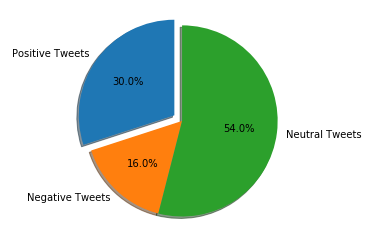

In [19]:
labels = 'Positive Tweets','Negative Tweets','Neutral Tweets'
sizes = [round(percentage_positive),round(percentage_negative),round(percentage_neutral)]
explodes = (0.1,0,0)
fig,ax = plt.subplots()
ax.pie(sizes,labels = labels,explode = explodes, autopct='%1.1f%%',shadow = True,startangle=90)
ax.axis('equal')
plt.show()

# World Cloud

In [20]:
str1 = ' '.join(test)

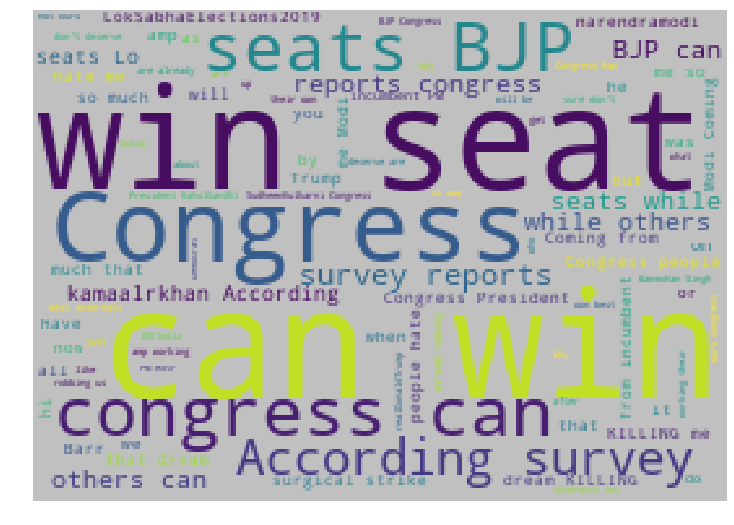

In [25]:
from PIL import Image
import urllib
import requests

stopwords = ['https','http','co','com','this','to','it','they','for','with','how','and','of','the','in','an','is','RT','twitter']
mask = np.array(Image.open(requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCenGmMGvgjwcc7zXHLPsVyngefDerqRHYNnGK6NTo3Uj-BVmsNg', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(stopwords, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='silver', stopwords=stopwords, mask=mask).generate(str1)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(stopwords, mask)

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [27]:
df = pd.read_json(r'C:\Users\Usman\Desktop\Project\congress.json', lines = True)

In [31]:
df['Date'] = pd.to_datetime(df.created_at)
df.set_index('Date', inplace=True)
monthly_summary = pd.DataFrame()
monthly_summary['retweet_count'] = df['retweet_count'].resample('D').mean()
monthly_summary.iplot(kind='bar', xTitle='Month', yTitle='Average',
    title='Daily Average Retweet Count Congress')

In [32]:
df['Date'] = pd.to_datetime(df.created_at)
df.set_index('Date', inplace=True)
monthly_summary = pd.DataFrame()
monthly_summary['favorite_count'] = df['favorite_count'].resample('D').mean()
monthly_summary.iplot(kind='bar', xTitle='Month', yTitle='Average',
    title='Daily Average Favorite Counts Congress')